/home/alinadimova/miniconda3/lib/python3.12/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


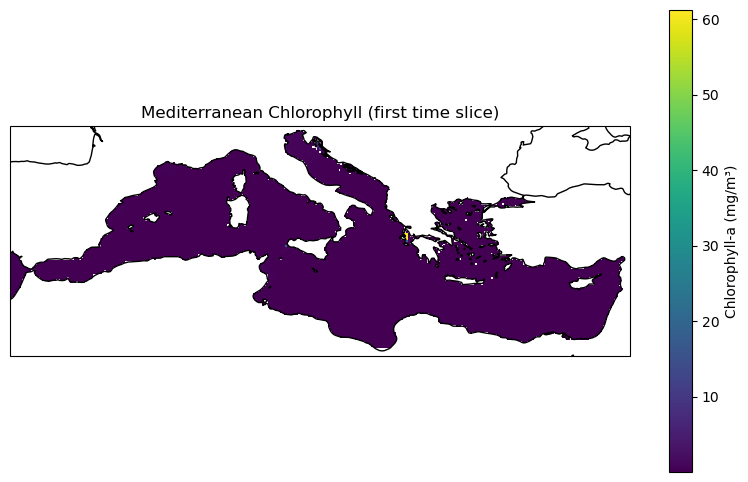

In [3]:
from erddapy import ERDDAP
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# 1. New ERDDAP object
e = ERDDAP(
    server="https://erddap.emodnet.eu/erddap",
    protocol="griddap"
)

# 2. Datasetz
e.dataset_id = "Mediterranean_Chl_3D_1466_63ca_ea7b"

# 3. Variables
e.variables = [
    "Water_body_chlorophyll_a_deepest",
    "latitude", "longitude", "time", "depth"
]

# 4. Constraints
e.constraints = {
    "time>=": "2020-01-01T00:00:00Z",
    "time<=": "2020-12-31T23:59:59Z",
    "depth=": 0.0,      # surface
    "latitude>=": 30,
    "latitude<=": 46,
    "longitude>=": -5,
    "longitude<=": 42,
}

# 5. Re-sync constraints!
e.griddap_initialize()

# 6. Fetch dataset
ds_chl = e.to_xarray()

# 7. Plot first slice
# Plot first slice (time only, no depth)
plt.figure(figsize=(10,6))
ax = plt.axes(projection=ccrs.PlateCarree())
ds_chl["Water_body_chlorophyll_a_deepest"].isel(time=0).plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap="viridis",
    cbar_kwargs={"label": "Chlorophyll-a (mg/m³)"}
)
ax.coastlines()
plt.title("Mediterranean Chlorophyll (first time slice)")
plt.show()
